Accuracy: 0.7804878048780488
Confusion Matrix:
[[20 23]
 [ 4 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123



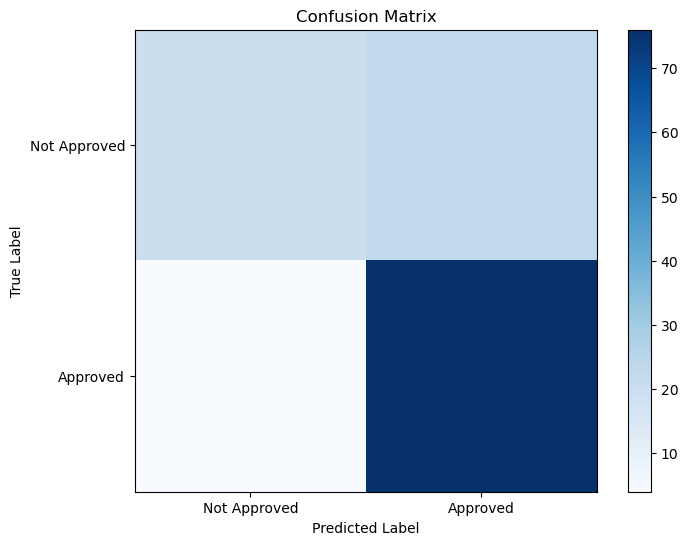

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

file_path = "C:\\Users\\sv697\\Downloads\\loan_prediction.csv"
loan_df = pd.read_csv(file_path)
loan_df.fillna(method='ffill', inplace=True)
loan_df['Dependents'].replace('3+', 3, inplace=True)

le = LabelEncoder()
loan_df['Gender'] = le.fit_transform(loan_df['Gender'])
loan_df['Married'] = le.fit_transform(loan_df['Married'])
loan_df['Education'] = le.fit_transform(loan_df['Education'])
loan_df['Self_Employed'] = le.fit_transform(loan_df['Self_Employed'])
loan_df['Property_Area'] = le.fit_transform(loan_df['Property_Area'])
loan_df['Loan_Status'] = le.fit_transform(loan_df['Loan_Status'])
loan_df['Dependents'] = pd.to_numeric(loan_df['Dependents'], errors='coerce')

loan_df.fillna(0, inplace=True)
X = loan_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = loan_df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.yticks([0, 1], ['Not Approved', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [2]:
print(loan_df.describe())

print(loan_df.head())

print(loan_df.isnull().sum())


           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.814332    0.651466    0.760586    0.218241       0.140065   
std      0.389155    0.476895    1.012005    0.413389       0.347338   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  147.141694        341.628664   
std        6109.041673        2926.248369   87.642949         65.656819   
min         150.000000           0.000000    0.0000

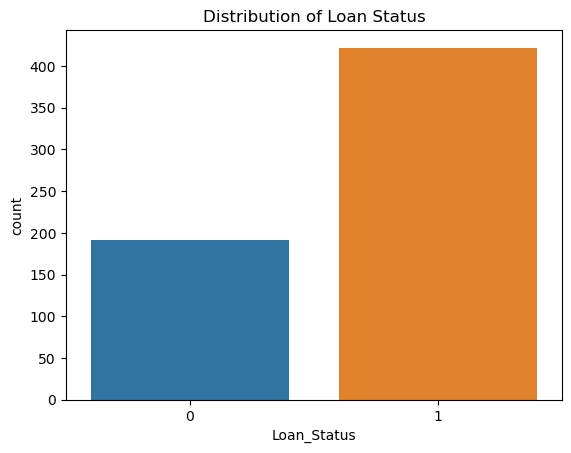

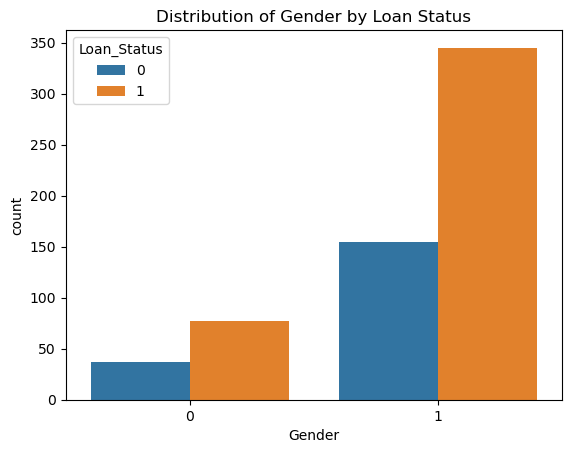

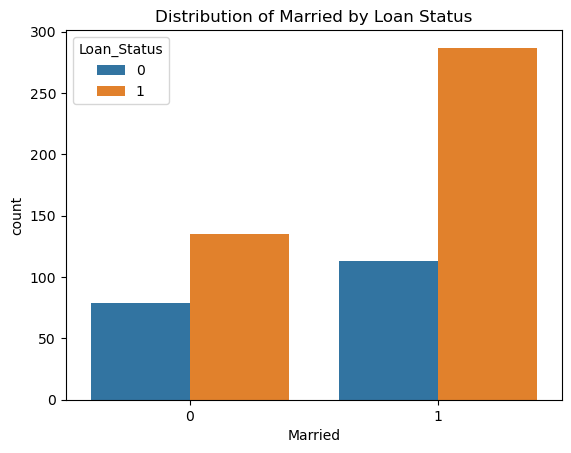

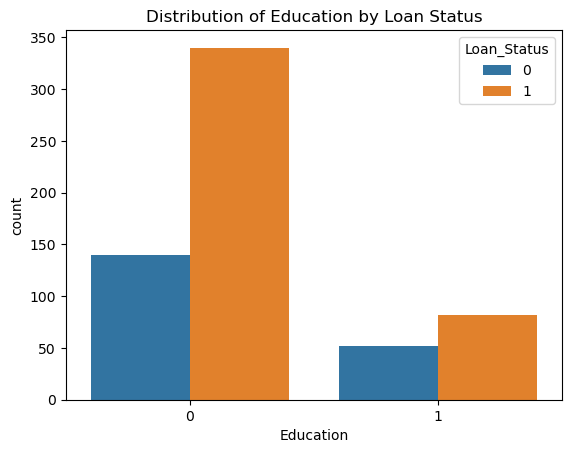

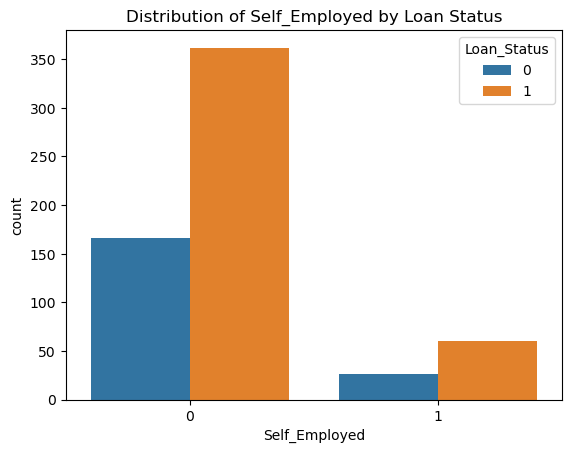

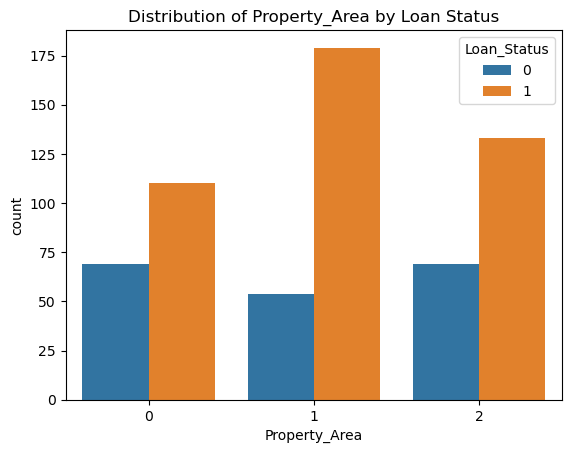

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Loan_Status', data=loan_df)
plt.title('Distribution of Loan Status')
plt.show()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    sns.countplot(x=col, hue='Loan_Status', data=loan_df)
    plt.title(f'Distribution of {col} by Loan Status')
    plt.show()


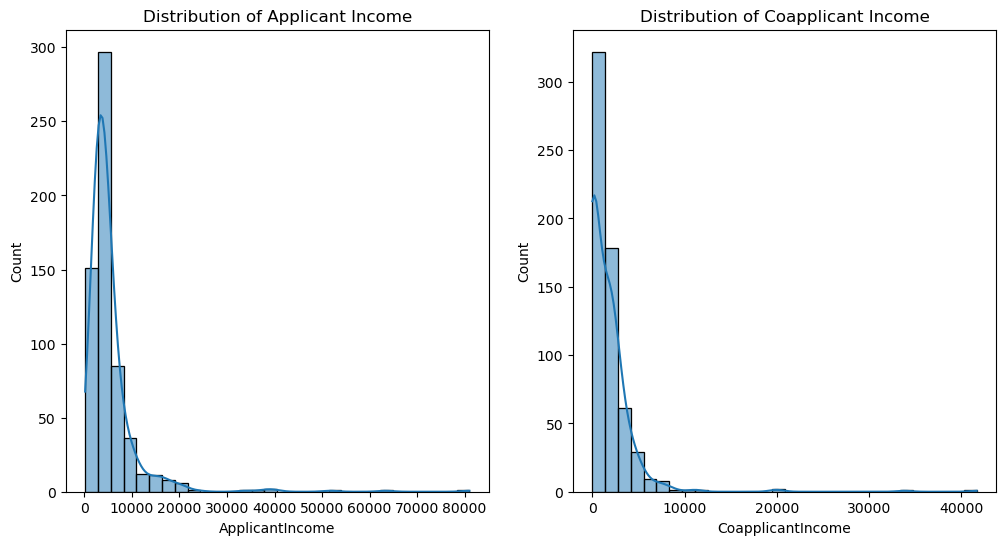

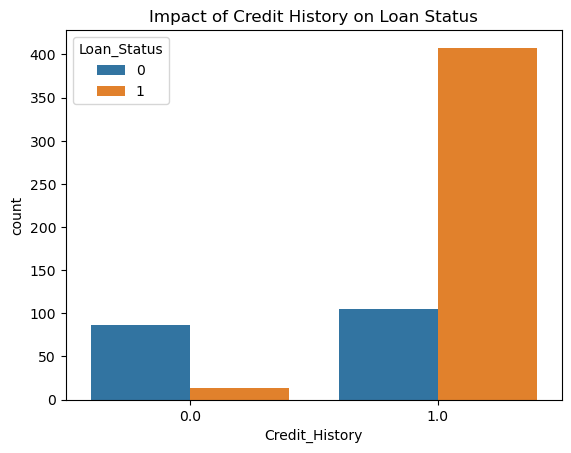

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(loan_df['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')

plt.subplot(1, 2, 2)
sns.histplot(loan_df['CoapplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Coapplicant Income')
plt.show()
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_df)
plt.title('Impact of Credit History on Loan Status')
plt.show()


In [5]:
print("Missing values before handling:")
print(loan_df.isnull().sum())
loan_df['Dependents'].replace('3+', 3, inplace=True)
loan_df['Dependents'] = pd.to_numeric(loan_df['Dependents'], errors='coerce')
loan_df.fillna(method='ffill', inplace=True)
print("\nMissing values after handling:")
print(loan_df.isnull().sum())


Missing values before handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing values after handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [6]:
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    loan_df[col] = le.fit_transform(loan_df[col])


In [7]:
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']


In [8]:
import numpy as np
loan_df['ApplicantIncome_log'] = np.log1p(loan_df['ApplicantIncome'])
loan_df['CoapplicantIncome_log'] = np.log1p(loan_df['CoapplicantIncome'])
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']


Logistic Regression Accuracy: 0.8130081300813008


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


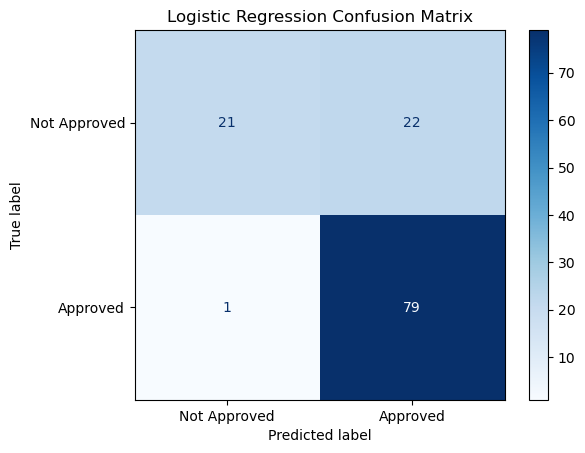

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
plot_confusion_matrix(logreg_model, X_test, y_test, display_labels=['Not Approved', 'Approved'], cmap=plt.cm.Blues)
plt.title('Logistic Regression Confusion Matrix')
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
cv_scores_logreg = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Logistic Regression): {cv_scores_logreg}")
print(f"Mean CV Accuracy (Logistic Regression): {cv_scores_logreg.mean()}")
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score (Logistic Regression): {roc_auc_logreg}")


Cross-Validation Scores (Logistic Regression): [0.81300813 0.76422764 0.7804878  0.84552846 0.81967213]
Mean CV Accuracy (Logistic Regression): 0.8045848327335733
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.95      0.49      0.65        43
           1       0.78      0.99      0.87        80

    accuracy                           0.81       123
   macro avg       0.87      0.74      0.76       123
weighted avg       0.84      0.81      0.79       123

AUC-ROC Score (Logistic Regression): 0.7761627906976745


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sv697\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Decision Tree Accuracy: 0.7235772357723578


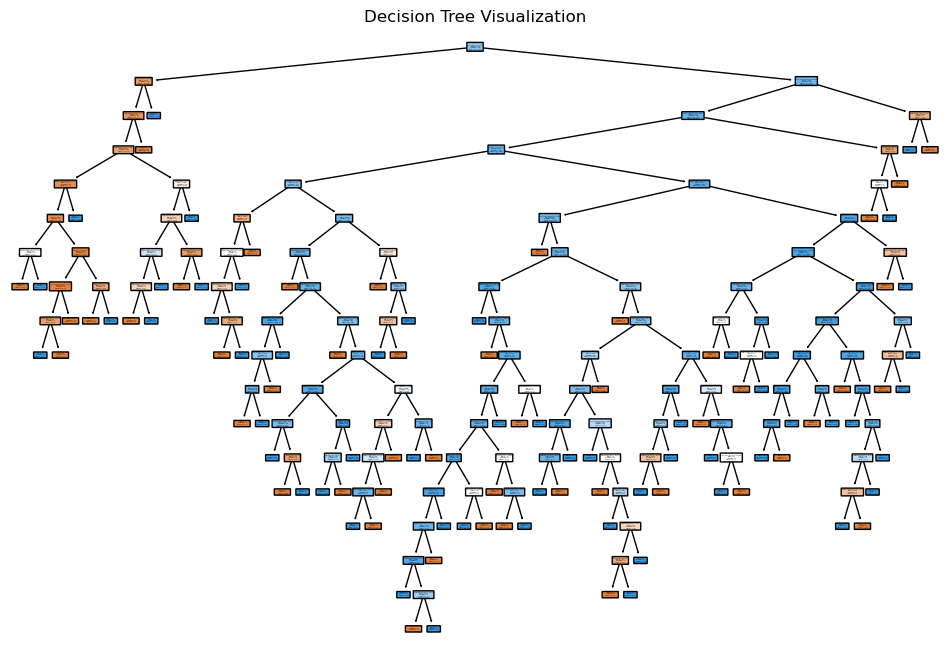

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy (Decision Tree): {cv_scores_dt.mean()}")
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score (Decision Tree): {roc_auc_dt}")


Cross-Validation Scores (Decision Tree): [0.69918699 0.63414634 0.64227642 0.70731707 0.69672131]
Mean CV Accuracy (Decision Tree): 0.6759296281487405
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        43
           1       0.77      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123

AUC-ROC Score (Decision Tree): 0.6853197674418605


Random Forest Accuracy: 0.7804878048780488


C:\Users\sv697\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


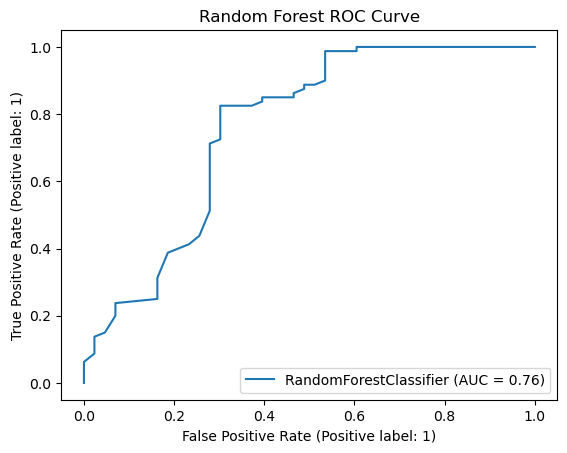

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
plot_roc_curve(rf_model, X_test, y_test)
plt.title('Random Forest ROC Curve')
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Random Forest): {cv_scores_rf}")
print(f"Mean CV Accuracy (Random Forest): {cv_scores_rf.mean()}")
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score (Random Forest): {roc_auc_rf}")


Cross-Validation Scores (Random Forest): [0.7804878  0.73170732 0.77235772 0.82926829 0.80327869]
Mean CV Accuracy (Random Forest): 0.7834199653471945
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123

AUC-ROC Score (Random Forest): 0.7582848837209303


In [15]:
from sklearn.model_selection import GridSearchCV
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df['LoanAmount_log'] = np.log1p(loan_df['LoanAmount'])
X = loan_df.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)
y = loan_df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred_rf_tuned = grid_search.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned}")

print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf_tuned))

roc_auc_rf_tuned = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score (Tuned Random Forest): {roc_auc_rf_tuned}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.7967479674796748
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.78      0.95      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.73      0.75       123
weighted avg       0.81      0.80      0.78       123

AUC-ROC Score (Tuned Random Forest): 0.7546511627906977


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df['LoanAmount_log'] = np.log1p(loan_df['LoanAmount'])

X = loan_df.drop(['Loan_ID', 'Loan_Status', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1)
y = loan_df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred_rf_tuned = grid_search.predict(X_test)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_rf_tuned}")

print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf_tuned))

roc_auc_rf_tuned = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score (Tuned Random Forest): {roc_auc_rf_tuned}")


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Tuned Random Forest Accuracy: 0.7967479674796748
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.78      0.95      0.86        80

    accuracy                           0.80       123
   macro avg       0.81      0.73      0.75       123
weighted avg       0.81      0.80      0.78       123

AUC-ROC Score (Tuned Random Forest): 0.7546511627906977


In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [18]:
import joblib
best_model_filename = 'best_tuned_random_forest_model.joblib'
joblib.dump(grid_search.best_estimator_, best_model_filename)

print(f"Best-tuned Random Forest model saved to {best_model_filename}")


Best-tuned Random Forest model saved to best_tuned_random_forest_model.joblib
